### Creating VGG-Net using Keras <br>

We have already seen VGG-Net in our previous [notebook](https://github.com/visionatseecs/keras-starter/blob/main/keras_inbuilt_classification.ipynb) where we have used keras' built-in model for VGG. In this notebook, we will create vgg-net  by ourselves, combining keras' layers. 

Here's the architecture of VGG16 which has 16 layers which include the Conv layers and the FC layers excluding final FC layer which is for classification. <br>
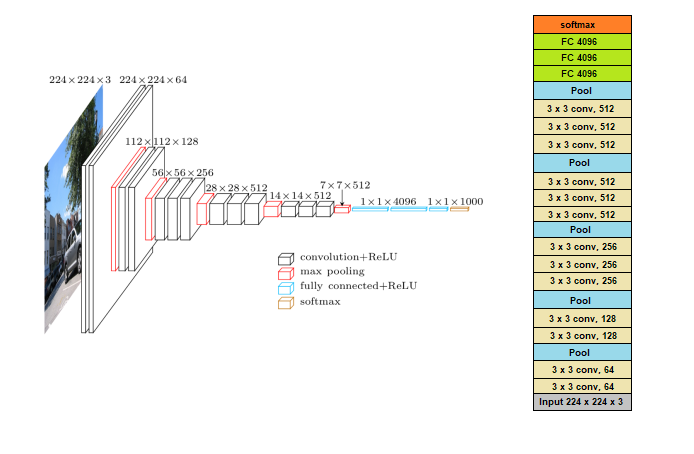

Let's create this model. But here are some changes:
* Our model's input shape is 150 x 150 x 3 because the data we are using is [intel-image-classification](https://www.kaggle.com/puneet6060/intel-image-classification) dataset where the images are of size 150 x 150 x 3.
* Last layer will have 6 units because the data has 6 classes namely buldings, forest, glacier, mountain, sea and street.

*Note: Loading [intel-image-classification](https://www.kaggle.com/puneet6060/intel-image-classification) data and using it for training was running out of memory because the data size is large, so I have used a [mini version](https://drive.google.com/drive/folders/1hrH8v_Kh3i1y-G_MOlto3YTPXwa9JfDH?usp=sharing) that has half the training images for this tutorial.*

In [ ]:
import keras
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

In [ ]:
vgg16 = Sequential()

In [ ]:
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
                 input_shape=(150, 150, 3)))
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
vgg16.add(Dropout(0.25))

vgg16.add(Flatten())

vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))

# the data we are using has 3 classes
vgg16.add(Dense(6, activation='softmax'))

In [ ]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0

### Loading data <br>
In the previous tutorials we were using dataset from `keras.datasets`, this time we will learn how to load data from the disk.


In [ ]:
# necessary imports
import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm

In [ ]:
# A function to load data from a given directory
def load_data(data_dir):
  data = []
  labels = []
  class_dirs = os.listdir(data_dir)
  
  for direc in class_dirs:
    class_dir = os.path.join(data_dir, direc)
    for imagepath in tqdm(list(paths.list_images(class_dir))):
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (150, 150))  # incase images not of same size
      data.append(image)
      labels.append(direc)
  # normalizing and converting to numpy array format
  data = np.array(data, dtype='float')/255.0
  labels = np.array(labels)
  return data, labels

In [ ]:
train_dir = "data/intel-image-classification-mini/seg_train/"
test_dir = "data/intel-image-classification-mini/seg_test/"
pred_dir = "data/intel-image-classification-mini/seg_pred/"

print('loading train images')
X_train, y_train = load_data(train_dir)
print('loading test images')
X_test, y_test = load_data(test_dir)

loading train images


100%|██████████| 1135/1135 [08:35<00:00,  2.20it/s]


loading test images


100%|██████████| 501/501 [03:32<00:00,  2.36it/s]


In [ ]:
X_train.shape

(7016, 150, 150, 3)

In [ ]:
X_test.shape

(3000, 150, 150, 3)

In the following code block, we are using a different approach for one hot encoding image labels. We are using sklearn's `LaberlBinarizer`. The outcome is same as keras' `to_categorical` function.

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
y_train[0]

array([1, 0, 0, 0, 0, 0])

We will split the train data into training and validation data. 20% of training data will be used for validation.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train,
                                                        test_size=0.2,
                                                        random_state=42)

Compile the model

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
vgg16.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

Train the model

In [ ]:
H = vgg16.fit(X_train, y_train, batch_size=128,
              epochs=50, 
              validation_data=(X_valid, y_valid))

Epoch 1/50
44/44 [==============================] - 48s 1s/step - loss: 1.7916 - accuracy: 0.1755 - val_loss: 1.7917 - val_accuracy: 0.1738
Epoch 2/50
44/44 [==============================] - 38s 865ms/step - loss: 1.7913 - accuracy: 0.1801 - val_loss: 1.7917 - val_accuracy: 0.1738
Epoch 3/50
44/44 [==============================] - 39s 877ms/step - loss: 1.7909 - accuracy: 0.1803 - val_loss: 1.7917 - val_accuracy: 0.1738
Epoch 4/50
44/44 [==============================] - 38s 871ms/step - loss: 1.7907 - accuracy: 0.1803 - val_loss: 1.7918 - val_accuracy: 0.1738
Epoch 5/50
44/44 [==============================] - 38s 873ms/step - loss: 1.7904 - accuracy: 0.1803 - val_loss: 1.7918 - val_accuracy: 0.1738
Epoch 6/50
44/44 [==============================] - 38s 874ms/step - loss: 1.7902 - accuracy: 0.1803 - val_loss: 1.7919 - val_accuracy: 0.1738
Epoch 7/50
44/44 [==============================] - 38s 875ms/step - loss: 1.7900 - accuracy: 0.1803 - val_loss: 1.7919 - val_accuracy: 0.1738
Ep

In [ ]:
# save the model's trained weights
vgg16.save_weights('vgg16_trained_wts.h5')

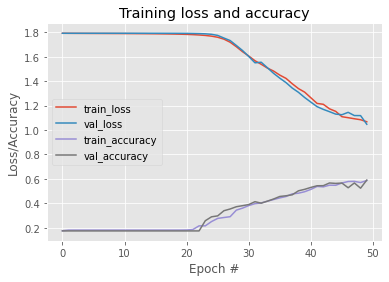

In [22]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

Evaluate

In [23]:
score = vgg16.evaluate(X_test, y_test, batch_size=64)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

47/47 [==============================] - 7s 150ms/step - loss: 1.0378 - accuracy: 0.5793
Test Loss =  1.0378016233444214
Test Accuracy =  0.5793333053588867


In [24]:
'''CONFUSION MATRIX'''
# Making prediction
y_pred = vgg16.predict_classes(X_test)
y_true = np.argmax(y_test, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
confusion_mtx

array([[210,  38,  28,  60,  36,  65],
       [ 15, 393,   7,   1,   1,  57],
       [ 16,   4, 247,  45, 233,   8],
       [ 43,   1,  43, 245, 184,   9],
       [ 26,   6, 107,  60, 303,   8],
       [ 55,  42,  46,  13,   5, 340]])

In this tutorial we learnt:
* how to create VGG-Net using keras primitive layers using Sequential API
* how to load data from disk using opencv
* how to train and evaluate the model

*The pred_dir folder in the dataset contains images which we can use to check the qualitative performance of our model. Your task is to load these images and check whether the predicted output is correct or not.*